In [1]:
import numpy as np
TestPerf = np.load("Test_Performance_CIFAR_FF.npy")
ValError = np.load("Val_Acc_Record.npy")

In [2]:
this = np.sum(np.sum(TestPerf,axis=0),axis=0)
NumComplete = 0
while this[NumComplete] >0:
    NumComplete +=1
print(NumComplete)

20


In [3]:
TestPerf = TestPerf[:,:,0:NumComplete]
ValError = ValError[:,:,0:NumComplete]

In [4]:
TestPerf_Mean = TestPerf.mean(axis=2)
TestPerf_StE = TestPerf.std(axis=2) / np.sqrt(NumComplete)

In [5]:
TestPerf_Mean

array([[11.03267102,  0.32485499],
       [11.93627892,  0.30920999],
       [11.36316419,  0.32409499],
       [11.15407314,  0.32466499],
       [11.25957079,  0.32469499]])

In [6]:
TestPerf_Mean + TestPerf_StE

array([[11.16373399,  0.32769708],
       [12.038766  ,  0.31239009],
       [11.46530166,  0.32684286],
       [11.27703728,  0.32732145],
       [11.36493774,  0.32734754]])

In [7]:
TestPerf_Mean - TestPerf_StE

array([[10.90160805,  0.3220129 ],
       [11.83379183,  0.3060299 ],
       [11.26102671,  0.32134712],
       [11.031109  ,  0.32200854],
       [11.15420384,  0.32204244]])

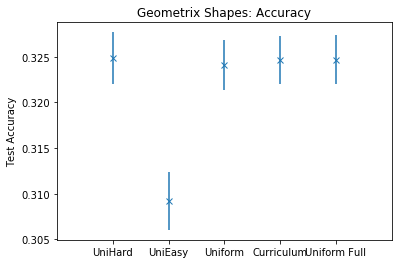

In [11]:
import matplotlib.pyplot as plt

flag = 1

labels = ['Hard','Easy','Uni','Curriculum']
plt.errorbar(np.array([1,2,3,4,5],dtype=int),TestPerf_Mean[:,flag],yerr = TestPerf_StE[:,flag],marker ='x',linestyle='none')
my_xticks = ['UniHard','UniEasy','Uniform','Curriculum','Uniform Full']
plt.xticks(np.array([1,2,3,4,5],dtype=int), my_xticks)
thisplot = plt.gca()
thisplot.set_xlim(0,6)
if flag == 0:
    thisplot.set_title('Geometrix Shapes: Error')
    thisplot.set_ylabel('Test Cross-Entropy')
else:
    thisplot.set_title('Geometrix Shapes: Accuracy')
    thisplot.set_ylabel('Test Accuracy')

plt.show()

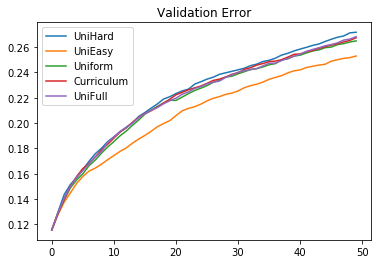

In [14]:
plt.plot(np.mean(ValError[0:50,:,:],axis=2))
plt.legend(['UniHard','UniEasy','Uniform','Curriculum','UniFull'],loc='best')
thisplot = plt.gca()
thisplot.set_title('Validation Error')
plt.show()

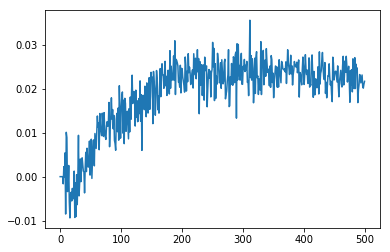

In [30]:
Diff = np.mean(ValError[:,0,:],axis=1) - np.mean(ValError[:,-1,:],axis=1)
plt.plot(Diff)
plt.show()

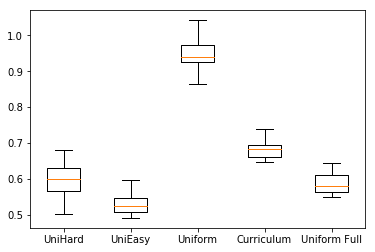

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
data = TestPerf[:,0,:]
ax.boxplot(data.T)
my_xticks =['UniHard','UniEasy','Uniform','Curriculum','Uniform Full']
plt.xticks(np.array([1,2,3,4,5],dtype=int), my_xticks)
plt.show()